In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as rc
%matplotlib inline

In [2]:
text_foreigner = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt",sep="\t",\
                   encoding="cp949")
text_foreigner.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [3]:
text_foreigner.columns = ['기준일자','구코드','행정동코드','업종코드','외국인 국가명','이용건수','이용금액']

In [4]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       3
dtype: int64

In [5]:
text_foreigner[text_foreigner["이용금액"].isna()==True].index

Int64Index([159857, 223832, 234647], dtype='int64')

In [6]:
print(text_foreigner.iloc[159857])
print(text_foreigner.iloc[223832])
print(text_foreigner.iloc[234647])

기준일자       20200422
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 159857, dtype: object
기준일자       20200527
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 223832, dtype: object
기준일자       20200423
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              6
이용금액            NaN
Name: 234647, dtype: object


NaN 값 value 확인 후 의미없는 데이터 확인

In [7]:
# NaN값 드랍시켜준 후 인덱스 재배열
text_foreigner.drop(159857,0,inplace=True)
text_foreigner.drop(223832,0,inplace=True)
text_foreigner.drop(234647,0,inplace=True)
text_foreigner = text_foreigner.reset_index(drop=True)

In [8]:
# NAN값 확인
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       0
dtype: int64

필요에 따른 정의서 dict 타입(replace 사용) - foreigner 전용
1. 국가
a = {"네덜란드":0,"대만":1,"독일":2,"러시아":3,"미국":4,"미주":5,"베트남":6,"스웨덴":7,"싱가폴":8,"아시아":9,\
     "영국" : 10,"오스트레일리아":11,"유럽":12,"일본":13,"정보없음":14,"중국":15,"중동/아프리카":16,"카자흐스탄":17\
     ,"캐나다":18,"태국":19,"프랑스":20,"필리핀":21,"홍콩":22}
     
text_foreigner["외국인 국가명"].replace(a,inplace=True)


2. 구코드
b = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}

text_foreigner["구코드"].replace(b,inplace=True)

3. 행정동 코드


4. 기준월
text_foreigner["기준월"] = pd.Series(map(lambda x:x//100,text_foreigner["기준일자"]))


5. 기준해
text_foreigner["기준해"] = pd.Series(map(lambda x:x//100,text_foreigner["기준월"]))


6. 월 단위 변환
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}

In [9]:
text_foreigner.head()

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [10]:
text_resident = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt",\
                            sep = "\t")

In [11]:
text_resident.columns = ['기준일자','구코드','행정동코드','업종코드','성별코드','나이코드','이용건수','이용금액']
text_resident.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


필요에 따른 정의성 dict 타입 - resident 전용

1. 성별코드 전환
a = {"F":1,"M":0}
text_resident["성별코드"].replace(a,inplace=True)


2. 기준 월 추가
text_resident["기준월"] = pd.Series(map(lambda x : x// 100 , text_resident["기준일자"]))


3. 기준 해 추가
text_resident["기준해"] = pd.Series(map(lambda x : x// 100 , text_resident["기준월"]))

4. 월 단위 변환
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}

In [12]:
# 월단위 2019년 2020년 카드 이용금액 시각화(외국인)
text_foreigner["기준월"] = pd.Series(map(lambda x:x//100,text_foreigner["기준일자"]))
text_foreigner["기준해"] = pd.Series(map(lambda x:x//100,text_foreigner["기준월"]))

In [13]:
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp = copy.copy(text_foreigner)
temp["기준월"].replace(c,inplace = True)

In [14]:
# 월단위 2019년 2020년 카드 이용금액 시각화(내국인)
text_resident["기준월"] = pd.Series(map(lambda x : x// 100 , text_resident["기준일자"]))
text_resident["기준해"] = pd.Series(map(lambda x : x// 100 , text_resident["기준월"]))
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp2 = copy.copy(pd.DataFrame(text_resident))
temp2.replace(c,inplace = True)
temp2.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액,기준월,기준해
0,20190201,110,517,10,F,25,11,595,2,2019
1,20190201,110,517,10,F,50,5,243,2,2019
2,20190201,110,517,10,F,55,5,27,2,2019
3,20190201,110,517,10,M,20,11,243,2,2019
4,20190201,110,517,10,M,25,11,433,2,2019


In [15]:
# 외국인 2019년 2020년 카드 이용 금액 비율
k = []
for i in range(2,6):
    a = temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020,i] * 100 /\
    temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019,i]
    k.append(a)
    print(i,"월 2019년 대비 2020년 소비 비율: {0:.2f}".format(a),"%")

2 월 2019년 대비 2020년 소비 비율: 51.91 %
3 월 2019년 대비 2020년 소비 비율: 5.08 %
4 월 2019년 대비 2020년 소비 비율: 4.05 %
5 월 2019년 대비 2020년 소비 비율: 4.43 %


In [16]:
# 내국인 2019년 2020년 카드 이용 금액 비율
t = []
for i in range(2,6):
    a = temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020,i] * 100 /\
    temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019,i]
    t.append(a)
    print(i,"월 2019년 대비 2020년 소비 비율: {0:.2f}".format(a),"%")

2 월 2019년 대비 2020년 소비 비율: 86.77 %
3 월 2019년 대비 2020년 소비 비율: 68.20 %
4 월 2019년 대비 2020년 소비 비율: 78.21 %
5 월 2019년 대비 2020년 소비 비율: 94.40 %


In [17]:
title = ["foreigner","resident","ratio"]

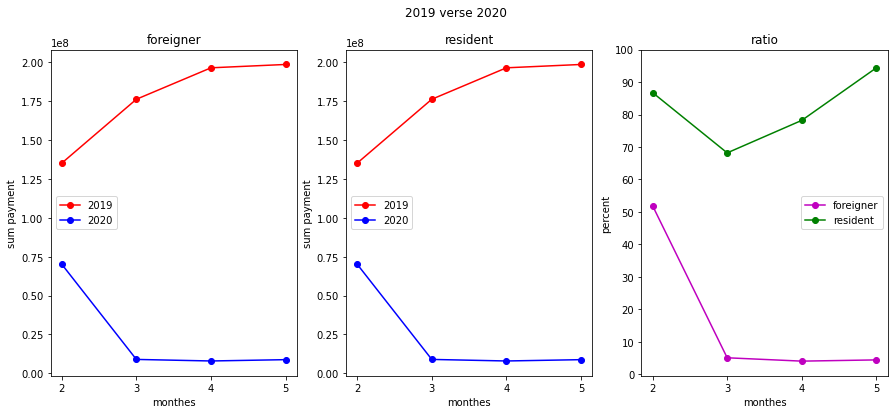

In [18]:
# 2019년과 2020년 월 단위 카드 이용금액 차이
fig = plt.figure()
fig.set_size_inches(15,6)
fig.suptitle("2019 verse 2020")
cnt = 0
for i in range(3):
    if i<=1:
        i = fig.add_subplot(1,3,i+1)
        i.plot(temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019],marker = 'o',c="r",label="2019")
        i.plot(temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020],marker = 'o',c="b",label="2020")
        i.legend(loc="center left")
        i.set_title(title[cnt])
        i.set_xlabel("monthes")
        i.set_ylabel("sum payment")
        i.set_xticks([2,3,4,5])
        cnt += 1
    else:
        i = fig.add_subplot(1,3,3)
        i.set_title("ratio")
        i.plot([2,3,4,5],k,marker = 'o',c="m",label = "foreigner")
        i.plot([2,3,4,5],t,marker = 'o',c="g",label = "resident")
        i.set_title(title[cnt])
        i.set_xlabel("monthes")
        i.set_ylabel("percent")
        i.legend(loc="center right")
        i.set_xticks([2,3,4,5])
        i.set_yticks([0,10,20,30,40,50,60,70,80,90,100])


# 2019년과 2020년 월 단위 카드 이용금액 정리
외국인 카드 이용금액과 같은 경우, 3,4,5월달은 전년도 대비 사용 비율이 5%에 불과하다.

내국인 카드 이용금액과 같은 경우, 코로나 직후 2~3월달 감소하는 추세를 보이다가 다시 복구되는 모양을 볼 수 있다.

** 주의사항 **
- 외국인과 내국인 소비액의 y축 크기가 다름
- 5월달에 내국인 카드 사용금액이 급증하는 이유는 긴급재난지원금이 지급된 것 또한 충분히 고려해야 할 사항이다.

In [19]:
# 월 단위 각 구 별 평균 이용금액
b = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}
temp3 = copy.copy(text_foreigner)
temp3["구코드"].replace(b,inplace=True)
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp3.replace(c,inplace=True)
temp3 = pd.DataFrame(temp3.groupby(["구코드","기준해","기준월"])["이용금액"].sum())

In [20]:
Gu = [x for x in set(text_foreigner["구코드"].replace(b))]

# 외국인 지역구 별 2019,2020년 월 단위 카드 이용금액

In [21]:
cnt = 0
print("단위 : 천 원 , 외국인")
indx = np.array([2,3,4,5])
for i in range(4):
    for k in indx:
        a = int(temp3.loc[Gu[i],2020,k]) / int(temp3.loc[Gu[i],2019,k]) * 100
        print(Gu[i],"의",k,"월 : {0:.2f}".format(a),"%")
        cnt += 1
    print()

단위 : 천 원 , 외국인
서울 노원구 의 2 월 : 71.20 %
서울 노원구 의 3 월 : 29.83 %
서울 노원구 의 4 월 : 33.10 %
서울 노원구 의 5 월 : 40.60 %

대구 수성구 의 2 월 : 53.34 %
대구 수성구 의 3 월 : 11.30 %
대구 수성구 의 4 월 : 11.31 %
대구 수성구 의 5 월 : 24.10 %

서울 중구 의 2 월 : 51.52 %
서울 중구 의 3 월 : 4.92 %
서울 중구 의 4 월 : 3.86 %
서울 중구 의 5 월 : 3.90 %

대구 중구 의 2 월 : 67.44 %
대구 중구 의 3 월 : 5.85 %
대구 중구 의 4 월 : 4.95 %
대구 중구 의 5 월 : 17.70 %



# 내국인 지역구별 2019년,2020년 월 단위 카드 이용금액 합계의 비율

In [22]:
temp4 = copy.copy(text_resident)
temp4["구코드"].replace(b,inplace=True)
temp4["기준월"].replace(c,inplace=True)
temp4 = pd.DataFrame(temp4.groupby(["구코드","기준해","기준월"])["이용금액"].sum())
cnt = 0
print("단위 : 천 원, 내국인")
for i in range(4):
    for k in indx:
        a = float(temp4.loc[Gu[i],2020,k]) / float(temp4.loc[Gu[i],2019,k]) * 100
        print(Gu[i],"의",k,"월 : {0:.2f}".format(a),"%")
        cnt += 1
    print()

단위 : 천 원, 내국인
서울 노원구 의 2 월 : 94.66 %
서울 노원구 의 3 월 : 78.81 %
서울 노원구 의 4 월 : 87.53 %
서울 노원구 의 5 월 : 103.96 %

대구 수성구 의 2 월 : 88.24 %
대구 수성구 의 3 월 : 64.84 %
대구 수성구 의 4 월 : 74.76 %
대구 수성구 의 5 월 : 92.57 %

서울 중구 의 2 월 : 86.40 %
서울 중구 의 3 월 : 71.35 %
서울 중구 의 4 월 : 78.88 %
서울 중구 의 5 월 : 93.16 %

대구 중구 의 2 월 : 74.69 %
대구 중구 의 3 월 : 46.05 %
대구 중구 의 4 월 : 65.62 %
대구 중구 의 5 월 : 85.96 %



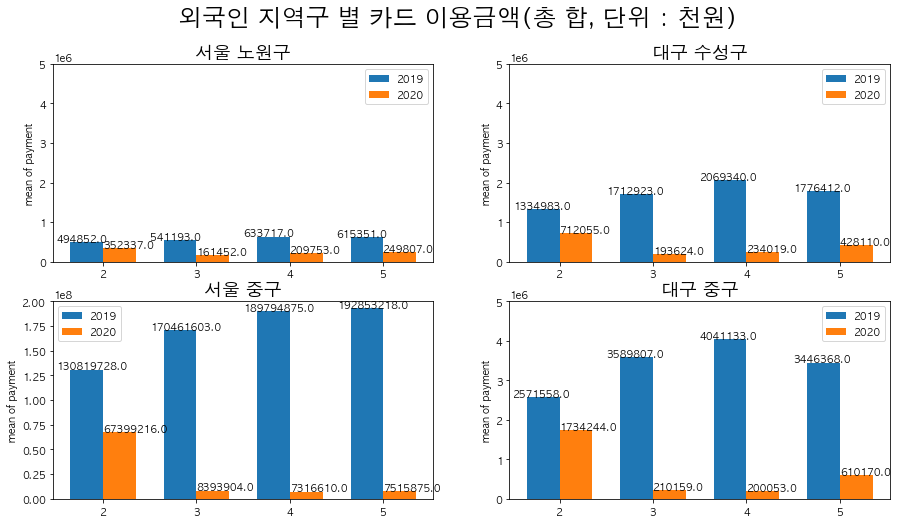

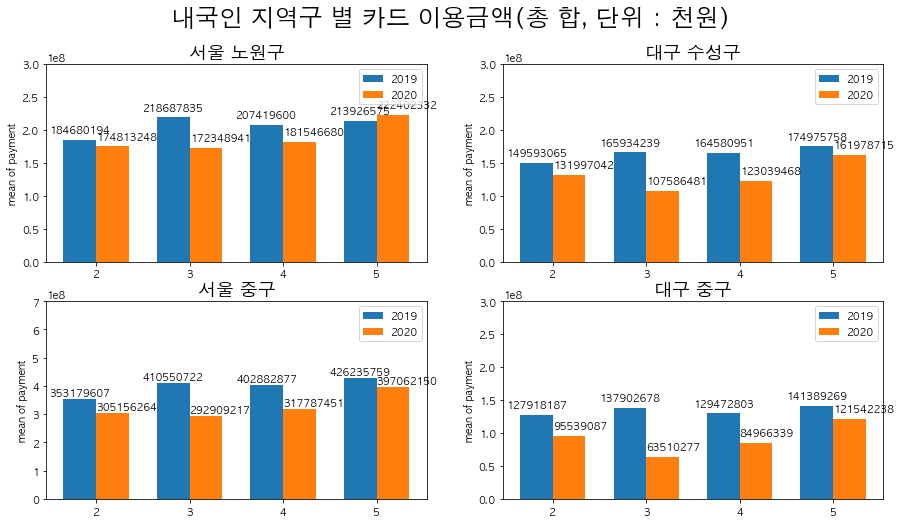

In [23]:
plt.rc('font', family='AppleGothic')
fig = plt.figure(figsize=(15,8))
bar_width = 0.35
cnt = 1
fig.suptitle("외국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize= 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp3.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label="2019")
    i.bar(indx+bar_width/2,temp3.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label="2020")
    i.set_title(Gu[cnt-1],fontsize=18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    a = [x for x in temp3.loc[Gu[cnt-1],2019]["이용금액"]]
    b = [x for x in temp3.loc[Gu[cnt-1],2020]["이용금액"]]
    for k,v in enumerate(a):
        i.text(k+1.5,v,str(v),color = 'black',fontweight = 'bold')
    for k,v in enumerate(b):
        i.text(k+2,v,str(v),color = 'black',fontweight = 'bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,200000000])
    else:
        i.set_ylim([0,5000000])
    cnt += 1
    

fig = plt.figure(figsize = (15,8))
cnt = 1
fig.suptitle("내국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize = 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp4.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label = "2019")
    i.bar(indx+bar_width/2,temp4.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label = "2020")
    a = [x for x in list(temp4.loc[Gu[cnt-1],2019]["이용금액"])]
    b = [x for x in list(temp4.loc[Gu[cnt-1],2020]["이용금액"])]
    i.set_title(Gu[cnt-1],fontsize = 18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    i.set_ylim(0,300000000)
    for k,v in enumerate(a):
        i.text(k+1.5 , v + 10000000, str(v), color='black', fontweight='bold')
    for k,v in enumerate(b):
        i.text(k+2 , v + 10000000, str(v), color='black', fontweight='bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,700000000])
    else:
        i.set_ylim([0,300000000])
    cnt+=1

** 주의 사항
- 서울 중구는 y축 값이 다르고 나머지는 모두 같다.

In [24]:
# 2019년, 2020년 월 단위 업종별 이용금액 총합
text_Definition = pd.read_excel("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터\
(혁신아이디어분야)/카드소비데이터(신한카드)_데이터정의서.xlsx",sheet_name=2,header=2)
del text_Definition["Unnamed: 0"]
text_Definition.columns = ["업종코드","세부 업종코드"]
a = [x for x in text_Definition["업종코드"]]
b = [x for x in text_Definition["업종코드"]]
for i in range(len(a)):
    if type(a[i]) == str:
        temp = int(a[i][-3:-1])
        a[i] = int(a[i][-3:-1])
    if type(a[i]) != str:
        a[i] = temp

for i in range(len(b)):
    if type(b[i]) == str:
        temp = b[i][0:-4]
        b[i] = b[i][0:-4]
    if type(b[i]) != str:
        b[i] = temp
dic = dict(zip(a,b))
dic

{10: '숙박',
 20: '레저용품',
 21: '레저업소',
 22: '문화취미',
 30: '가구',
 31: '전기',
 32: '주방용구',
 33: '연료판매',
 34: '광학제품',
 35: '가전',
 40: '유통업',
 42: '의복',
 43: '직물',
 44: '신변잡화',
 50: '서적문구',
 52: '사무통신',
 60: '자동차판매',
 62: '자동차정비',
 70: '의료기관',
 71: '보건위생',
 80: '요식업소',
 81: '음료식품',
 92: '수리서비스'}

In [25]:
temp_Findustry = copy.copy(text_foreigner)
temp_Findustry["업종코드"].replace(dic,inplace=True)
temp_Findustry["기준월"].replace(c,inplace=True)
tempF = pd.DataFrame(temp_Findustry.groupby(["기준해","기준월","업종코드"])["이용금액"].sum())
industry = [x for x in list(set(temp_Findustry["업종코드"]))]
monthes = np.array([x for x in set(temp_Findustry["기준월"])])
years = [x for x in set(temp_Findustry["기준해"])]
for i in range(2,5):
    tempF.loc[2020,i,"전기"] = 0
indx = np.array([x for x in range(len(industry))])

In [26]:
temp_Rindustry = copy.copy(text_resident)
temp_Rindustry["기준월"].replace(c,inplace=True)
temp_Rindustry["업종코드"].replace(dic,inplace=True)
tempR = pd.DataFrame(temp_Rindustry.groupby(["기준해","기준월","업종코드"])["이용금액"].sum())

for i in range(2,6):
    x = [x for x in tempR.loc[2019,i].index.tolist()]
    y = [y for y in tempR.loc[2020,i].index.tolist()]
    print(len(x),len(y))

23 23
23 23
23 23
23 23


/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


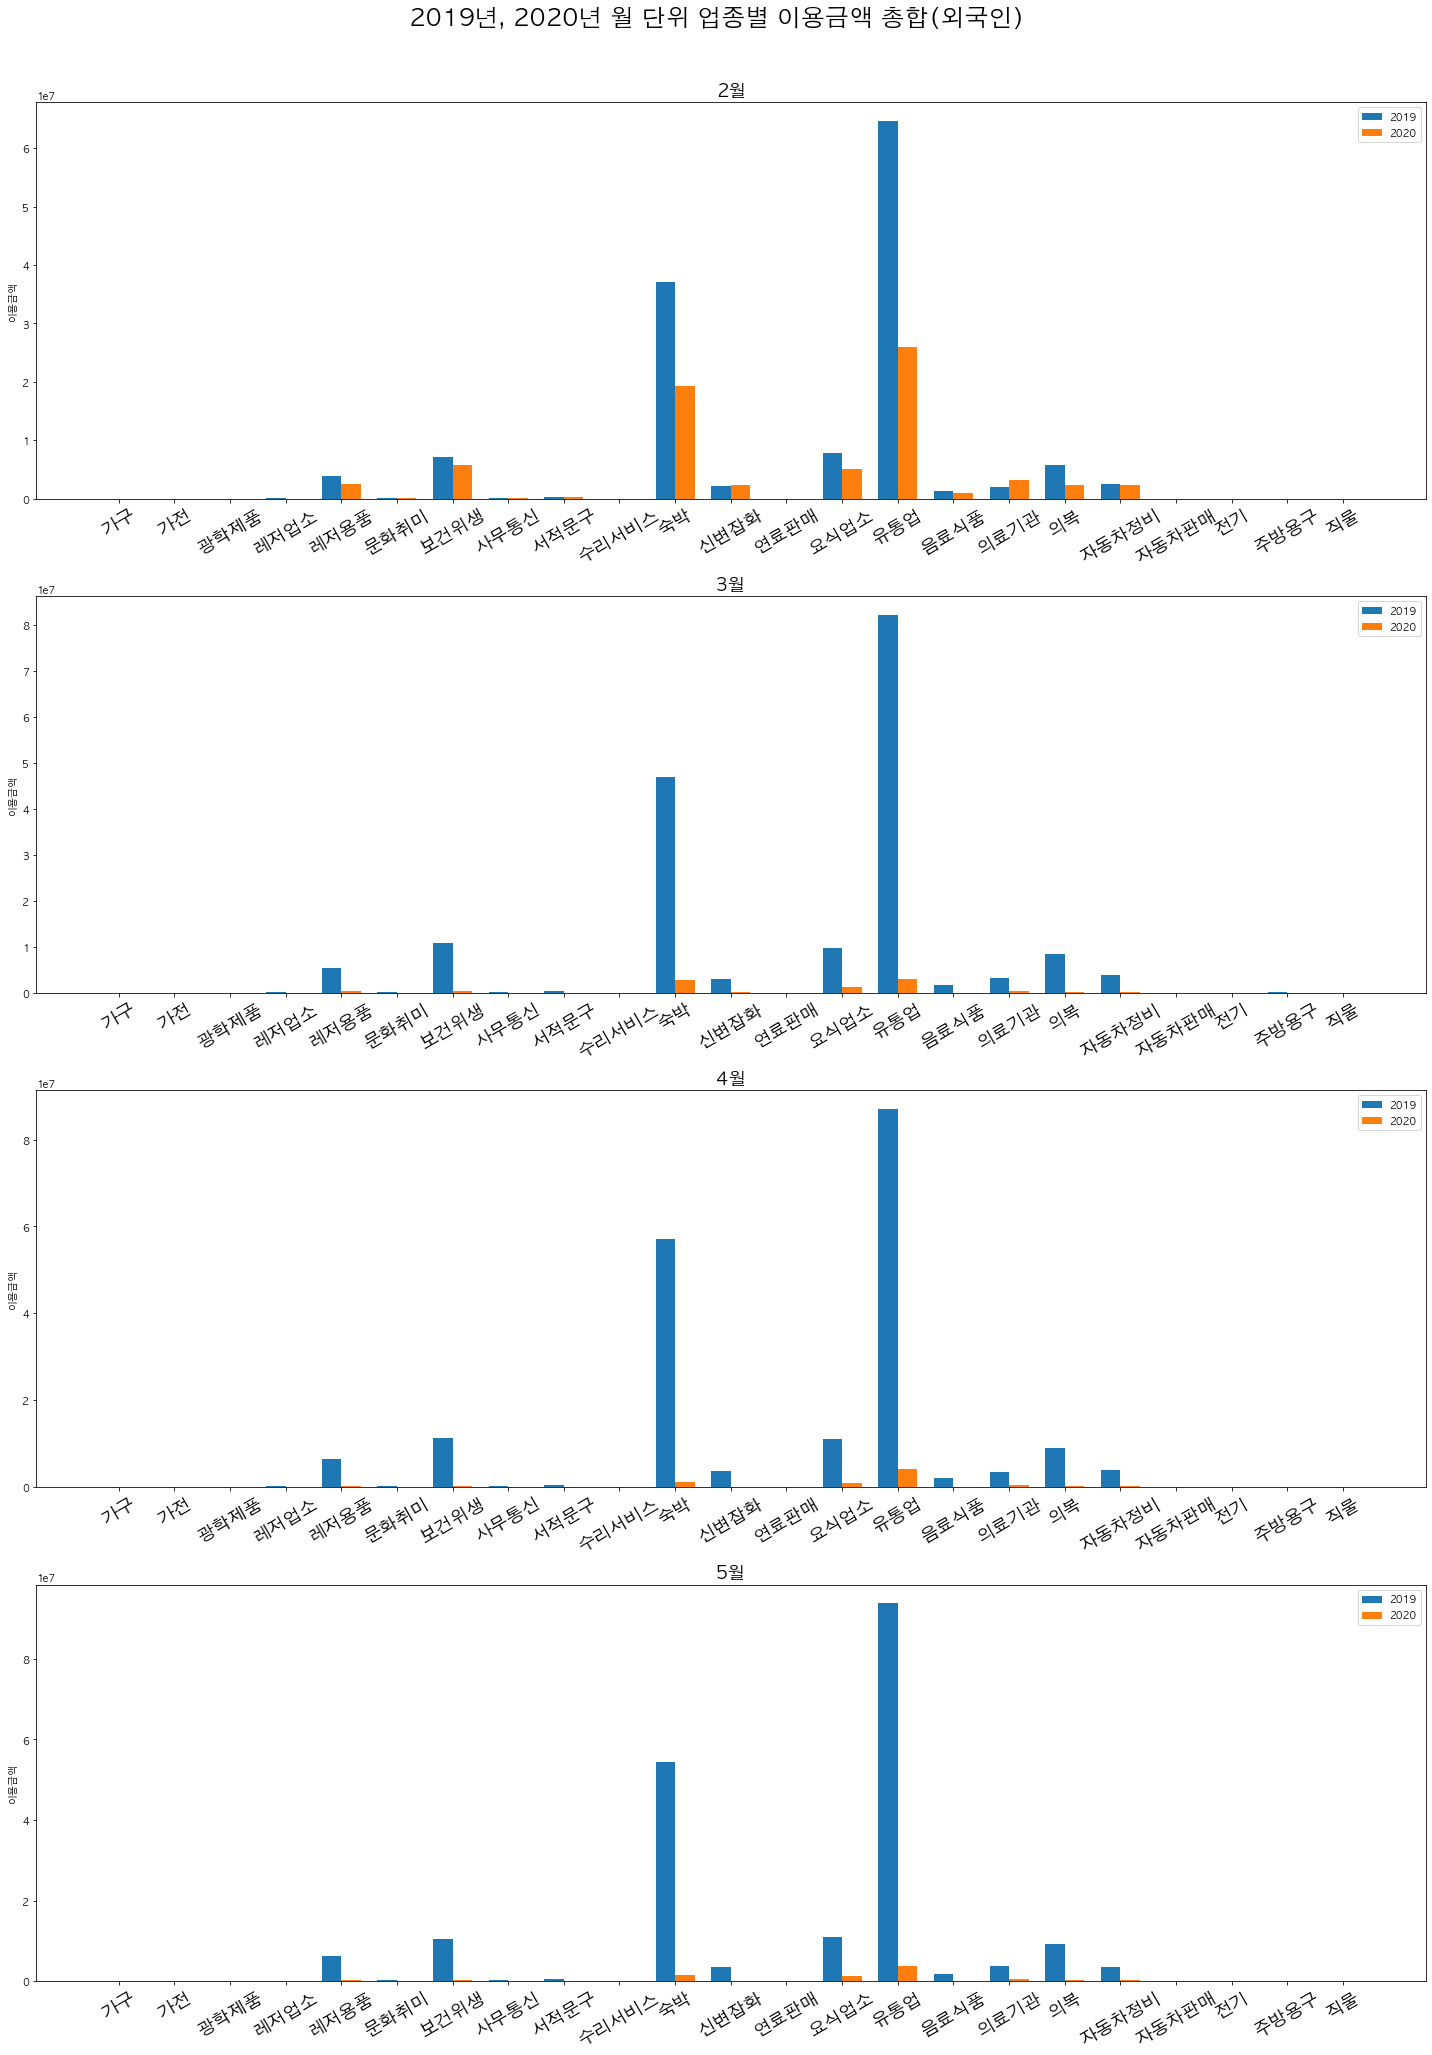

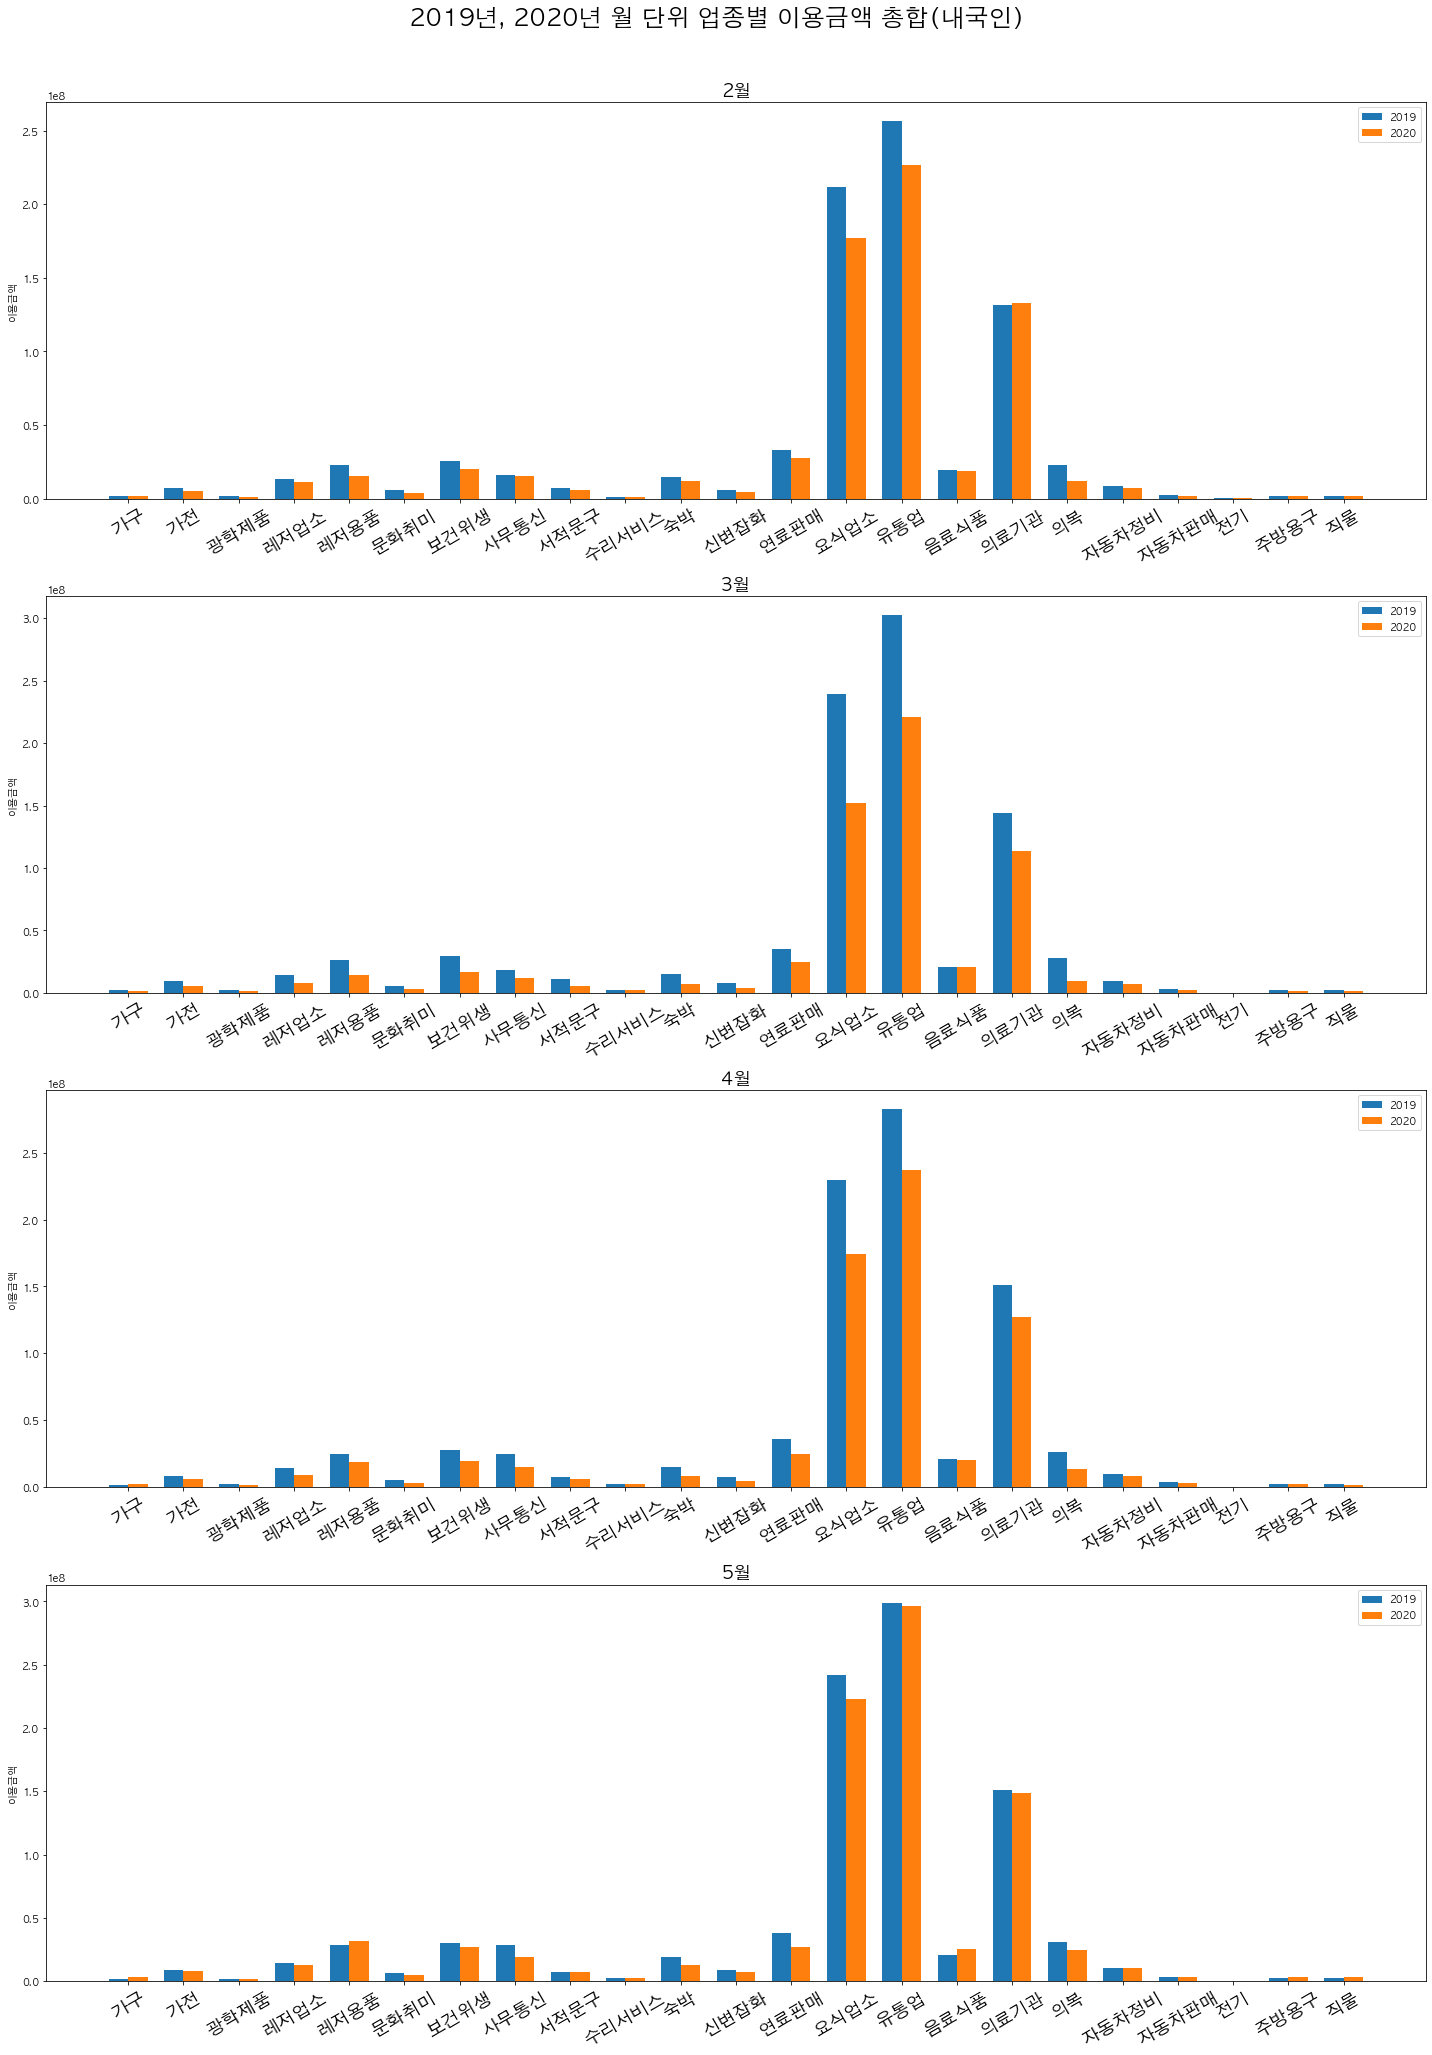

In [27]:
plt.rc('font',family = 'AppleGothic')
fig = plt.figure(figsize=(20,30))
bar_width = 0.35
x = [x for x in range(len(industry))]
cnt = 2
a = ["2월","3월","4월","5월"]
fig.suptitle("2019년, 2020년 월 단위 업종별 이용금액 총합(외국인)",fontsize=24)
for i in a:
    i = fig.add_subplot(4,1,cnt-1)
    i.bar(indx-bar_width/2,tempF.loc[2019,cnt,:]["이용금액"].tolist(),bar_width,label = "2019")
    i.bar(indx+bar_width/2,tempF.loc[2020,cnt,:]["이용금액"].tolist(),bar_width,label = "2020")
    i.set_title(a[cnt-2],fontsize=18)
    i.legend(loc = "best")
    i.set_ylabel("이용금액")
    i.set_xticks(x)
    i.set_xticklabels(tempF.loc[2019,2].index.tolist(),rotation = 30,fontsize=18)
    cnt+=1
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig = plt.figure(figsize=(20,30))
cnt = 1
fig.suptitle("2019년, 2020년 월 단위 업종별 이용금액 총합(내국인)",fontsize=24)
for i in range(4):
    i = fig.add_subplot(4,1,cnt)
    i.bar(indx - bar_width/2,tempR.loc[2019,cnt+1,:]["이용금액"].tolist(),bar_width,label = "2019")
    i.bar(indx + bar_width/2,tempR.loc[2020,cnt+1,:]["이용금액"].tolist(),bar_width,label = "2020")
    i.set_title(a[cnt-1],fontsize = 18)
    i.legend(loc = "best")
    i.set_ylabel("이용금액")
    i.set_xticks([x for x in range(len(x))])
    i.set_xticklabels(tempR.loc[2019,2].index.tolist(),rotation=30,fontsize = 18)
    cnt+=1
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

** 주의사항 **
- 외국인 데이터와 같은 경우, 2~4월 전기 데이터는 존재하지 않기 때문에 0으로 넣어줬다.
- 이용금액의 월 별 합계이기 때문에, 이용건수와 값이 다를 수 있다.
- 보이지 않는 업종코드의 데이터는 아래 CompareF CompareR을 이용해서 확인 할 수 있다.

# CompareF(업종코드 중 한 가지) foreigner
> 업종코드 중 한가지의 2019년 2020년 월별 수치 비교 데이터 프레임 출력

> 업종코드 종류  : 숙박 ,레저용품 ,레저업소 ,문화취미 ,가구 ,전기 ,주방용구 ,연료판매 ,광학제품 ,가전 ,유통업 ,의복 ,직물 ,신변잡화 ,서적문구 ,사무통신 ,자동차판매 ,자동차정비 ,의료기관 ,보건위생 ,요식업소 ,음료식품 ,수리서비스

In [28]:
def CompareF(ind):
    a = pd.DataFrame(temp_Findustry.loc[temp_Findustry["업종코드"] == ind].groupby(["기준해","기준월"])["이용금액"].sum())
    print("(외국인)"+ind + "의 2019년 2020년 월별 이용금액 합계 수치")
    a.plot(kind='bar',legend = False)
    return a 

(외국인)음료식품의 2019년 2020년 월별 이용금액 합계 수치


이용금액
기준해  기준월           
2019 2    1295022.0
     3    1638413.0
     4    2098116.0
     5    1648351.0
2020 2     933974.0
     3      53940.0
     4      51841.0
     5      54636.0

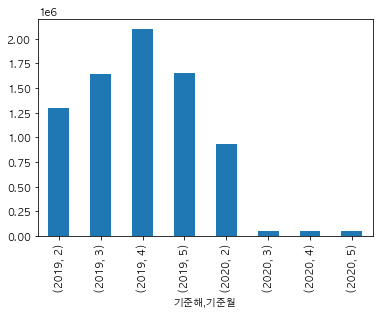

In [29]:
CompareF("음료식품")

# CompareR(업종코드 중 한 가지)  resident
> 업종코드 중 한가지의 2019년 2020년 월별 수치 비교 데이터 프레임 출력

> 업종코드 종류 : 숙박 ,레저용품 ,레저업소 ,문화취미 ,가구 ,전기 ,주방용구 ,연료판매 ,광학제품 ,가전 ,유통업 ,의복 ,직물 ,신변잡화 ,서적문구 ,사무통신 ,자동차판매 ,자동차정비 ,의료기관 ,보건위생 ,요식업소 ,음료식품 ,수리서비스

In [30]:
def CompareR(ind):
    a = pd.DataFrame(temp_Rindustry.loc[temp_Rindustry["업종코드"] == ind].groupby(["기준해","기준월"])["이용금액"].sum())
    print("(내국인)" + ind + "의 2019년 2020년 월별 이용금액 합계 수치")
    a.plot(kind='bar',legend = False)
    return a

(내국인)전기의 2019년 2020년 월별 이용금액 합계 수치


이용금액
기준해  기준월        
2019 2    285246
     3    258662
     4    219586
     5    287607
2020 2    250001
     3    295553
     4    254832
     5    289612

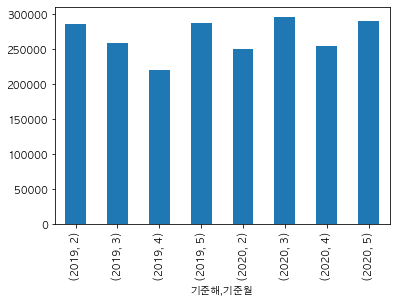

In [31]:
CompareR("전기")

# 월 단위 업종 별 이용건수 총 합 비교(외국인)
- 물류 데이터에서 물류이용건수에서 2019년보다 2020년이 높게 나왔다는 데이터를 확인하고, 비교해보기 위해 코딩
- 참고로 2019년 2020년 카드이용데이터에서 유통부분은 총 이용금액 합계 2019년이 간소한 차이로 더 놓게 나왔음.

In [32]:
tempF

이용금액
기준해  기준월 업종코드           
2019 2   가구      11817.0
         가전      31413.0
         광학제품    39687.0
         레저업소    85584.0
         레저용품  3869246.0
...                  ...
2020 5   주방용구     7806.0
         직물       2592.0
     2   전기          0.0
     3   전기          0.0
     4   전기          0.0

[184 rows x 1 columns]

In [33]:
tempF = copy.copy(text_foreigner)
tempF["업종코드"].replace(dic,inplace=True)
tempF["기준월"].replace(c,inplace=True)
tempF = pd.DataFrame(tempF.groupby(["기준해","기준월","업종코드"])["이용건수"].sum())
tempF.head()

이용건수
기준해  기준월 업종코드       
2019 2   가구       18
         가전      136
         광학제품    338
         레저업소    754
         레저용품  27691

In [34]:
for i in range(4):
    print(len(tempF.loc[2019,i+2].index.tolist()), len(tempF.loc[2020,i+2].index.tolist()))

for i in range(4):
    a = tempF.loc[2019,i+2].index.tolist()
    b = tempF.loc[2020,i+2].index.tolist()
    x = [x for x in a if x not in b]
    print("2020년 {0}월에 없는 업종코드 : ".format(i+2),''.join(x))

23 22
23 22
23 22
23 23
2020년 2월에 없는 업종코드 :  전기
2020년 3월에 없는 업종코드 :  전기
2020년 4월에 없는 업종코드 :  전기
2020년 5월에 없는 업종코드 :  


In [35]:
# 주어지지않은 업종코드 데이터 0으로 넣어주고, index 정렬
for i in range(2,5):
    tempF.loc[2020,i,"전기"] = 0

In [36]:
tempF.sort_index()

이용건수
기준해  기준월 업종코드        
2019 2   가구        18
         가전       136
         광학제품     338
         레저업소     754
         레저용품   27691
...               ...
2020 5   자동차정비   2305
         자동차판매     27
         전기         2
         주방용구      24
         직물        54

[184 rows x 1 columns]

In [37]:
indx = np.arange(23)
bar_width = 0.35

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.


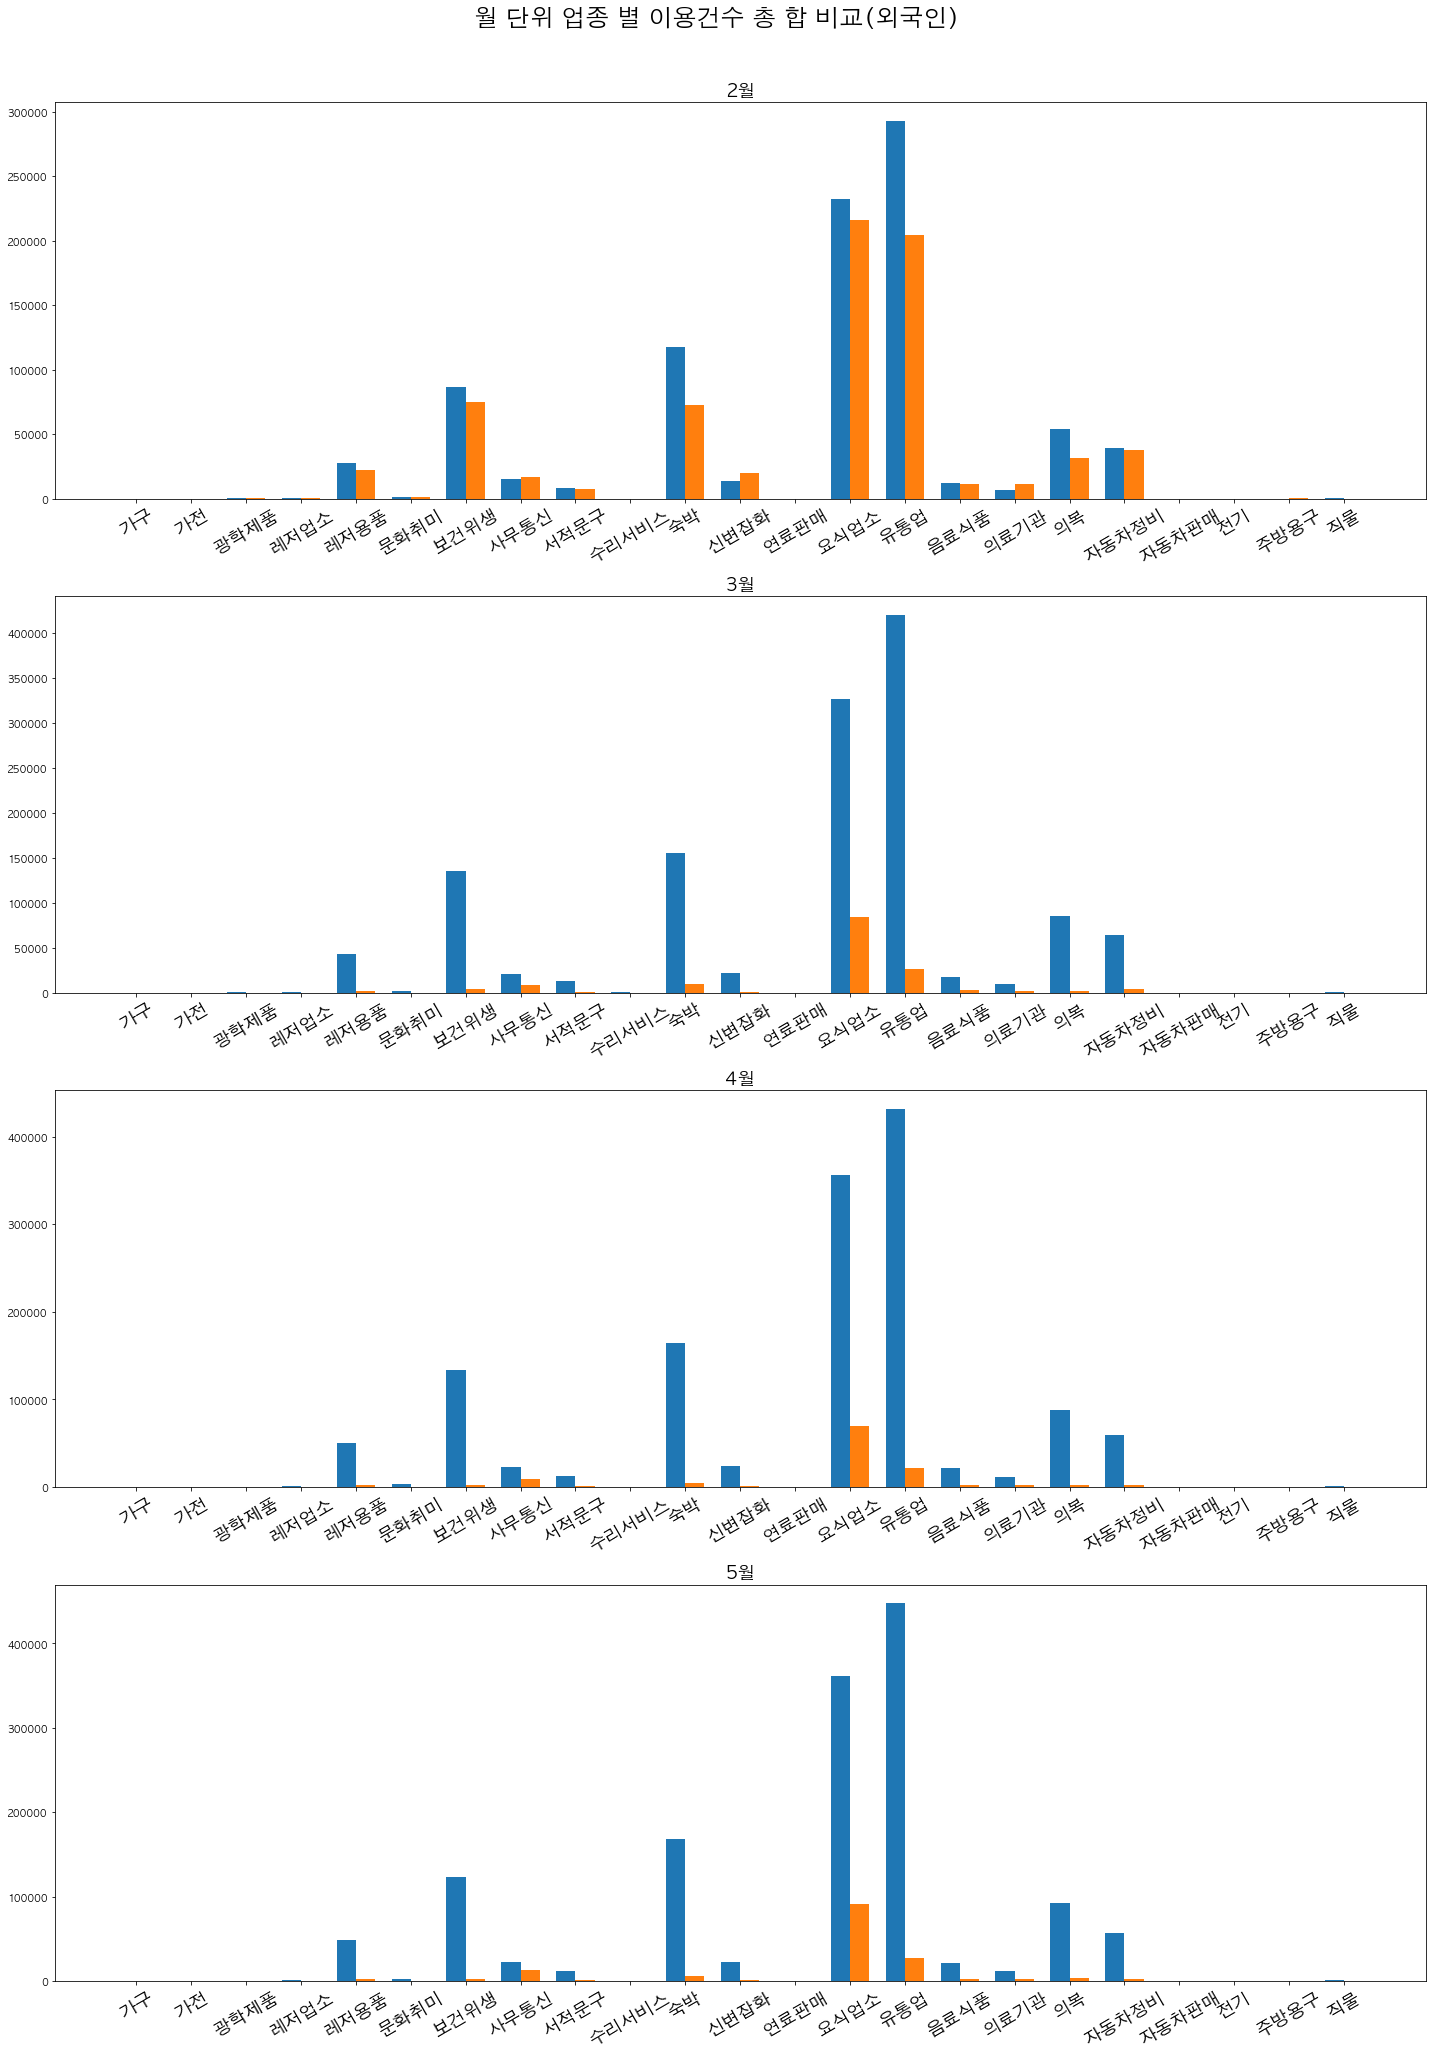

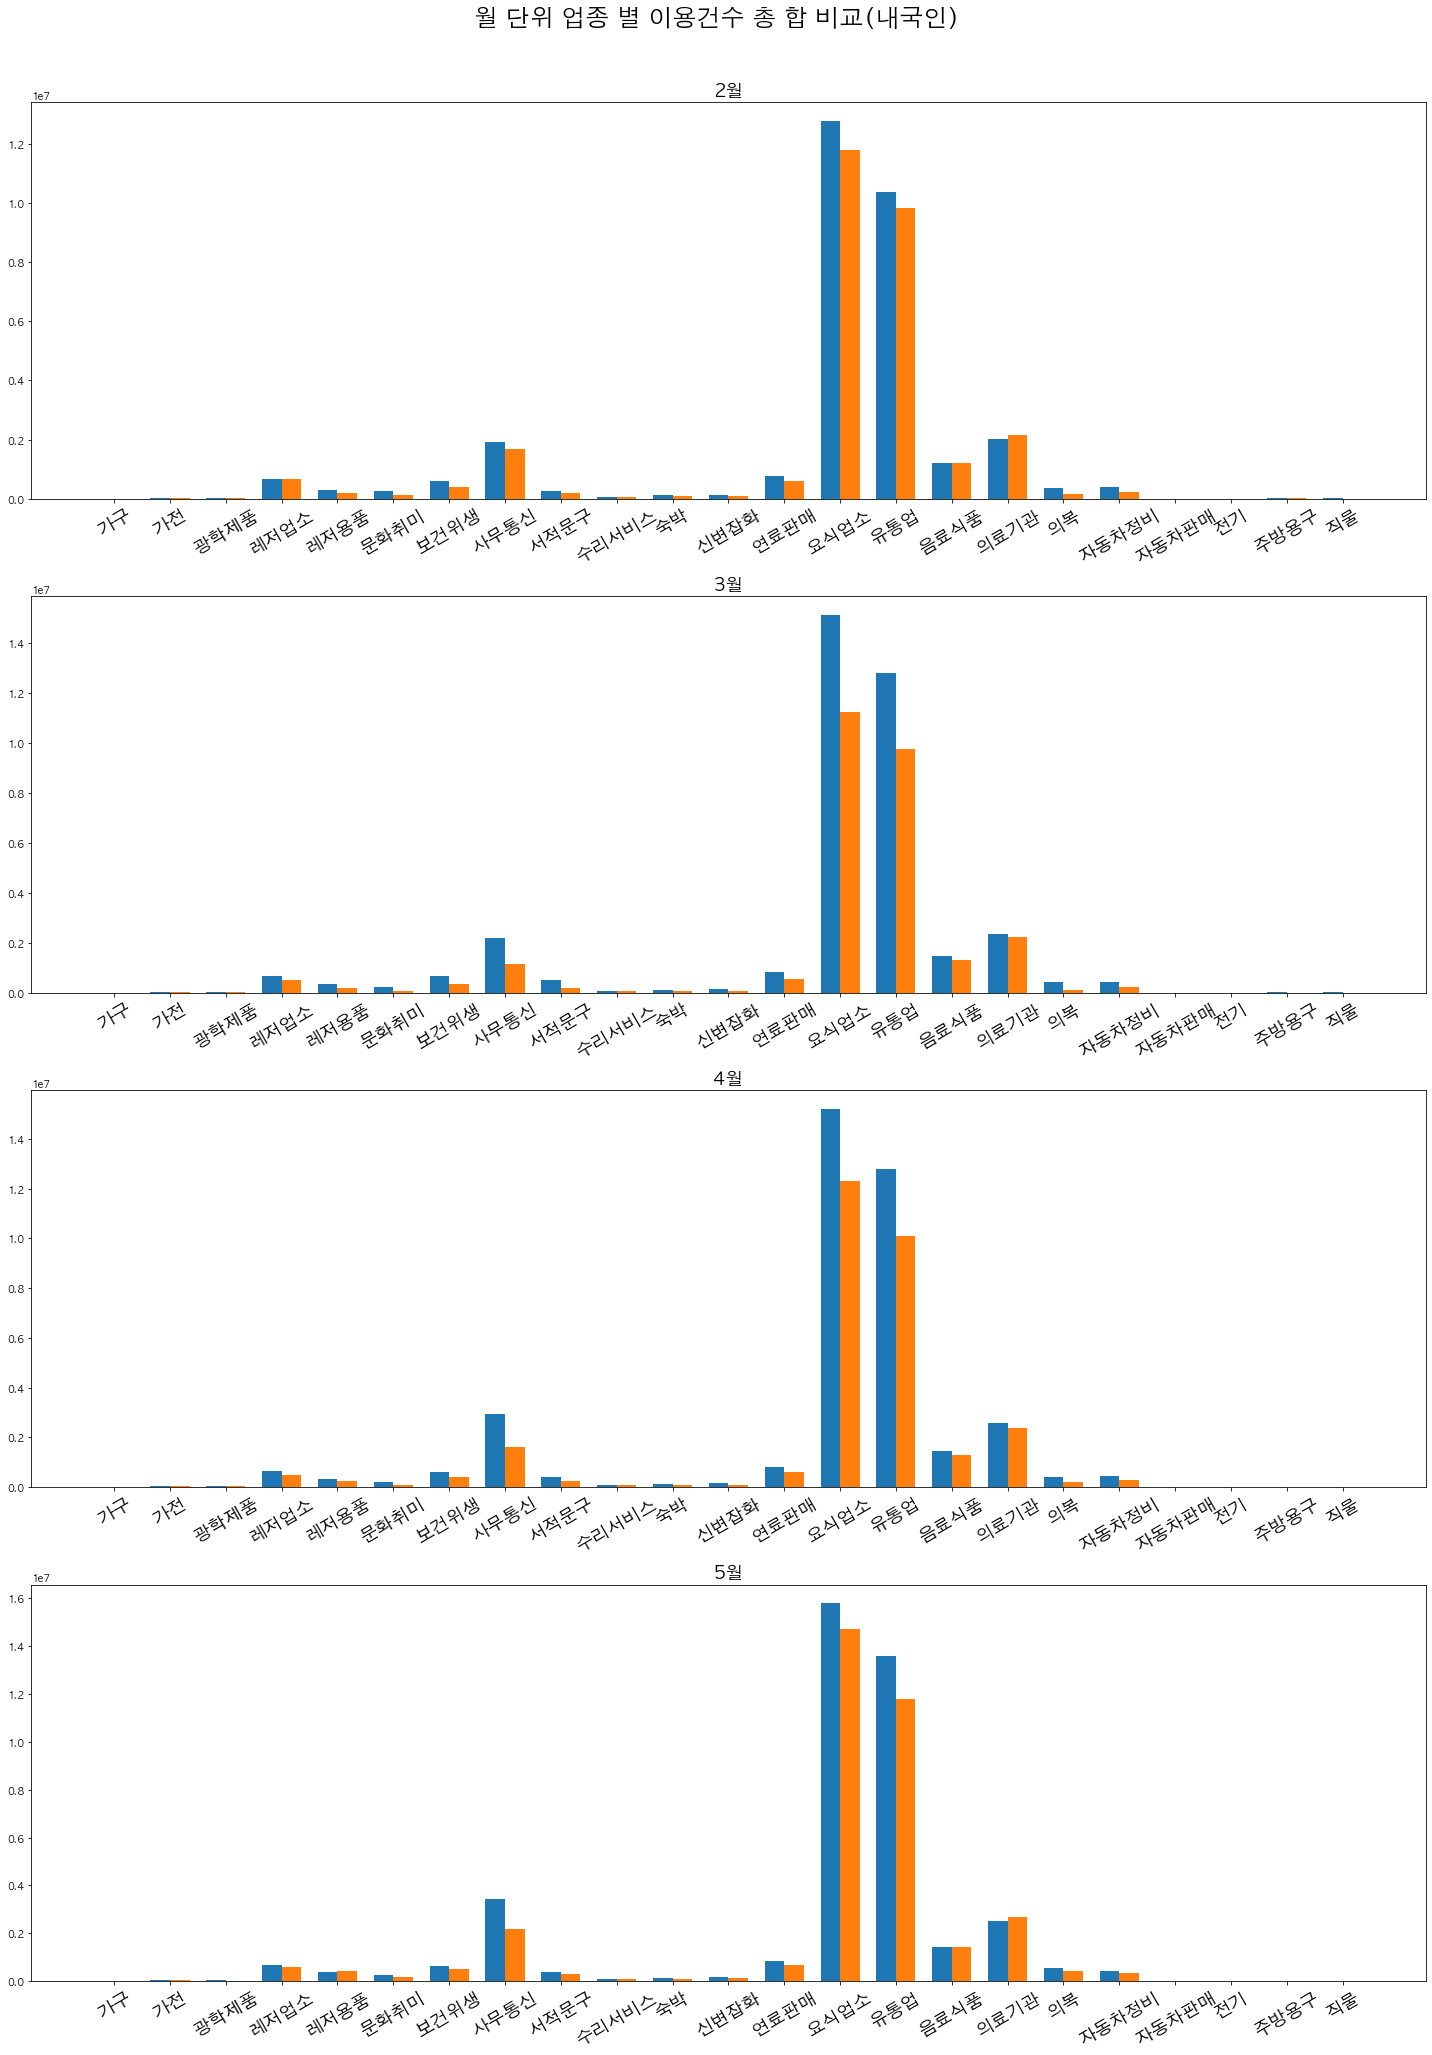

In [38]:
fig = plt.figure(figsize=(20,30))
fig.suptitle("월 단위 업종 별 이용건수 총 합 비교(외국인)",fontsize = 24)
cnt = 0
for i in range(4):
    i = fig.add_subplot(4,1,cnt+1)
    i.bar(indx - bar_width/2,tempF.loc[2019,cnt+2,:]["이용건수"].tolist(),bar_width,label = "2019")
    i.bar(indx + bar_width/2,tempF.loc[2020,cnt+2,:]["이용건수"].tolist(),bar_width,label = "2020")
    i.set_title("{0}월".format(cnt+2),fontsize= 18)
    i.set_xticks(indx)
    i.set_xticklabels(tempF.loc[2019,cnt+2].index.tolist(),rotation=30,fontsize=18)
    cnt += 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

tempR = copy.copy(text_resident)
tempR["기준월"].replace(c,inplace = True)
tempR["업종코드"].replace(dic,inplace = True)
tempR = pd.DataFrame(tempR.groupby(["기준해","기준월","업종코드"])["이용건수"].sum())
fig = plt.figure(figsize=(20,30))
fig.suptitle("월 단위 업종 별 이용건수 총 합 비교(내국인)",fontsize = 24)
cnt = 0
for i in range(4):
    i = fig.add_subplot(4,1,cnt+1)
    i.bar(indx - bar_width/2,tempR.loc[2019,cnt+2,:]["이용건수"].tolist(),bar_width,label = "2019")
    i.bar(indx + bar_width/2,tempR.loc[2020,cnt+2,:]["이용건수"].tolist(),bar_width,label = "2020")
    i.set_title("{0}월".format(cnt+2),fontsize= 18)
    i.set_xticks(indx)
    i.set_xticklabels(tempR.loc[2019,cnt+2].index.tolist(),rotation=30,fontsize=18)
    cnt += 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [39]:
def CompareF_count(ind):
    a = pd.DataFrame(temp_Findustry.loc[temp_Findustry["업종코드"] == ind].groupby(["기준해","기준월"])["이용건수"].sum())
    print("(외국인)" + ind + "의 2019년 2020년 월별 횟수 수치")
    a.plot(kind='bar',legend = False)
    return a 

In [40]:
def CompareR_count(ind):
    a = pd.DataFrame(temp_Rindustry.loc[temp_Rindustry["업종코드"] == ind].groupby(["기준해","기준월"])["이용건수"].sum())
    print("(내국인)" + ind + "의 2019년 2020년 월별 횟수 수치")
    a.plot(kind='bar',legend = False)
    return a

(외국인)가전의 2019년 2020년 월별 횟수 수치


이용건수
기준해  기준월      
2019 2     136
     3     238
     4     261
     5     190
2020 2      93
     3      21
     4      14
     5      28

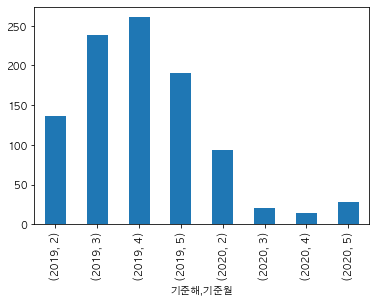

In [41]:
CompareF_count("가전")

# 성별에 따른 월 단위 총 이용금액 차이
> 성별은 내국인 데이터에만 있음

In [42]:
temp = copy.copy(text_resident)

In [43]:
temp.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액,기준월,기준해
0,20190201,110,517,10,F,25,11,595,201902,2019
1,20190201,110,517,10,F,50,5,243,201902,2019
2,20190201,110,517,10,F,55,5,27,201902,2019
3,20190201,110,517,10,M,20,11,243,201902,2019
4,20190201,110,517,10,M,25,11,433,201902,2019


In [44]:
e = {"F":"여자","M":"남자"}
temp.replace(c,inplace = True)
temp.replace(e,inplace = True)

In [45]:
temp = pd.DataFrame(temp.groupby(["기준해","성별코드","기준월"])["이용금액"].sum())

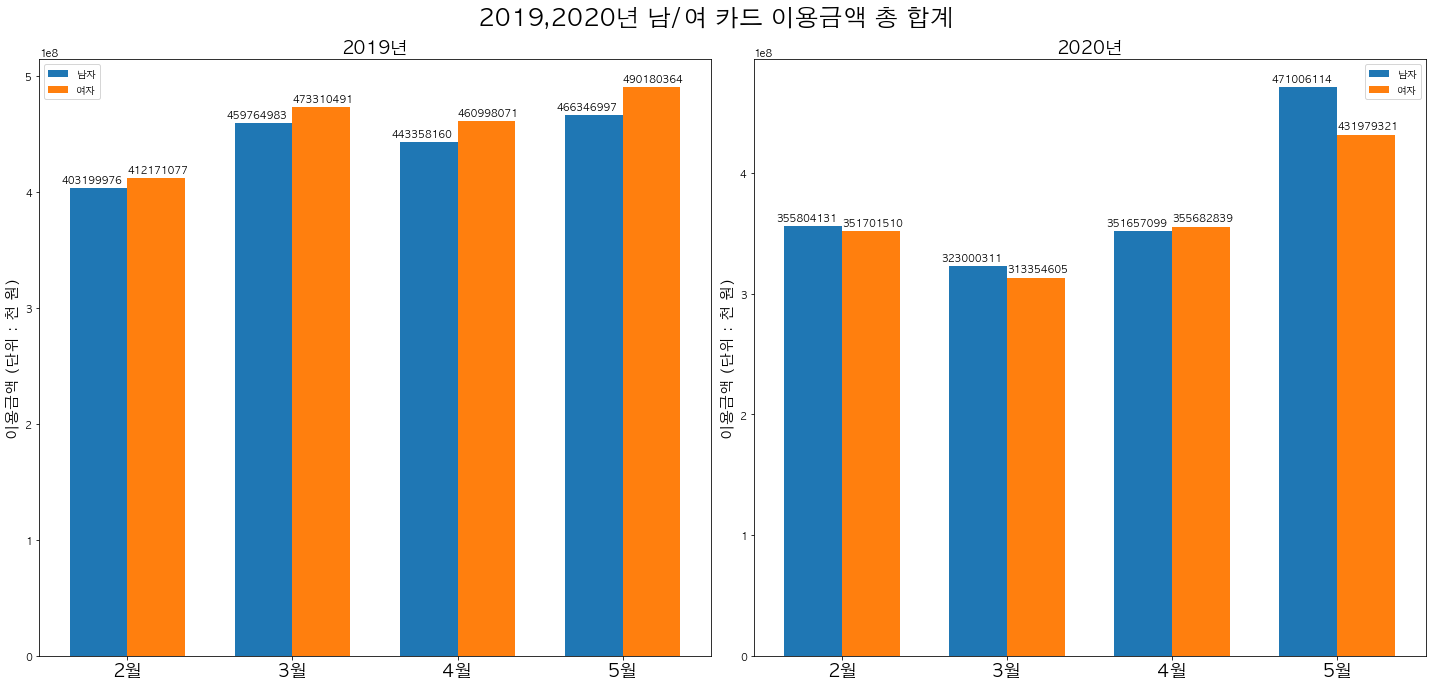

In [46]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("2019,2020년 남/여 카드 이용금액 총 합계",fontsize = 24)
cnt = 1
year = 2019
monthes = ["2월","3월","4월","5월"]
indx = np.array([2,3,4,5])
bar_width = 0.35
for i in range(2):
    i = fig.add_subplot(1,2,cnt)
    i.bar(indx - bar_width/2,temp.loc[year,"남자",:]["이용금액"].tolist(),bar_width,label = '남자'.format(year))
    i.bar(indx + bar_width/2,temp.loc[year,"여자",:]["이용금액"].tolist(),bar_width,label = '여자'.format(year))
    i.set_title("{0}년".format(year),fontsize = 18)
    i.set_xticks([2,3,4,5])
    i.set_xticklabels(monthes,fontsize = 18)
    a = [x for x in temp.loc[year,"남자",:]["이용금액"].tolist()]
    b = [x for x in temp.loc[year,"여자",:]["이용금액"].tolist()]
    for k,v in enumerate(a):
        i.text(k+1.6 , v+4000000, str(v), color='black', fontweight='bold')
    for k,v in enumerate(b):
        i.text(k+2 , v+4000000, str(v), color='black', fontweight='bold')
    i.legend(loc = "best")
    i.set_ylabel("이용금액 (단위 : 천 원)",fontsize = 15)
    year += 1
    cnt += 1
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

2019년에는 남자보다 여자가 카드매출 합계가 꾸준히 높았는데 2020년에는 엇비슷한 4월을 제외하고 항상 남자가 높다.

In [47]:
# 유동인구데이터와 비교
# 업종 코드 {10: '숙박', 20: '레저용품', 21: '레저업소', 22: '문화취미', 62: '자동차정비', 80: '요식업소', 81: '음료식품'} 이용

In [48]:
b = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}

In [49]:
tempR = copy.copy(text_resident)
tempR.drop('나이코드',axis = 1,inplace = True)
tempR.drop('성별코드',axis = 1,inplace = True)
tempR["구코드"].replace(b,inplace = True)
tempR.sort_index
tempR

,기준일자,구코드,행정동코드,업종코드,이용건수,이용금액,기준월,기준해
0,20190201,대구 중구,517,10,11,595,201902,2019
1,20190201,대구 중구,517,10,5,243,201902,2019
2,20190201,대구 중구,517,10,5,27,201902,2019
3,20190201,대구 중구,517,10,11,243,201902,2019
4,20190201,대구 중구,517,10,11,433,201902,2019
...,...,...,...,...,...,...,...,...
2537748,20200531,서울 노원구,720,81,19,127,202005,2020
2537749,20200531,서울 노원구,720,81,33,211,202005,2020
2537750,20200531,서울 노원구,720,81,9,61,202005,2020
2537751,20200531,서울 노원구,720,81,19,194,202005,2020


In [50]:
tempF = copy.copy(text_foreigner)
tempF.drop('외국인 국가명',axis = 1,inplace = True)
tempF

,기준일자,구코드,행정동코드,업종코드,이용건수,이용금액,기준월,기준해
0,20190204,260,510,81,2,30.0,201902,2019
1,20190213,260,510,40,2,32.0,201902,2019
2,20190416,260,510,40,2,16.0,201904,2019
3,20190419,260,510,42,3,610.0,201904,2019
4,20190308,260,510,10,7,629.0,201903,2019
...,...,...,...,...,...,...,...,...
238821,20200507,350,640,40,6,29.0,202005,2020
238822,20200512,350,612,40,3,15.0,202005,2020
238823,20200512,350,670,40,2,13.0,202005,2020
238824,20200516,350,640,71,1,39.0,202005,2020


In [51]:
temp = pd.concat([tempF,tempR])

In [52]:
temp["기준월"].replace(c,inplace = True)

In [53]:
ind = {10: '숙박', 20: '레저용품', 21: '레저업소', 22: '문화취미', 62: '자동차정비', 80: '요식업소', 81: '음료식품'}
h = []
for i,v in ind.items():
    h.append(v)
a = []

for i,v in ind.items():
    for j in range(2,6):
        temp1 = pd.DataFrame(temp.loc[(temp["업종코드"] == i) & (temp["기준월"] == j )& (temp["기준일자"] <= 20200000)].groupby\
                              (["기준해","기준월","기준일자"])["이용금액"].sum())
        temp2 = pd.DataFrame(temp.loc[(temp["업종코드"] == i) & (temp["기준월"] == j )& (temp["기준일자"] > 20200000)].groupby\
                              (["기준해","기준월","기준일자"])["이용금액"].sum())
        temp1.reset_index(inplace = True)
        temp1.drop("기준해",axis = 1,inplace = True)
        temp1.drop("기준월",axis = 1,inplace = True)
        a.append(temp1)
        temp2.reset_index(inplace = True)
        temp2.drop("기준해",axis = 1,inplace = True)
        temp2.drop("기준월",axis = 1,inplace = True)        
        a.append(temp2)


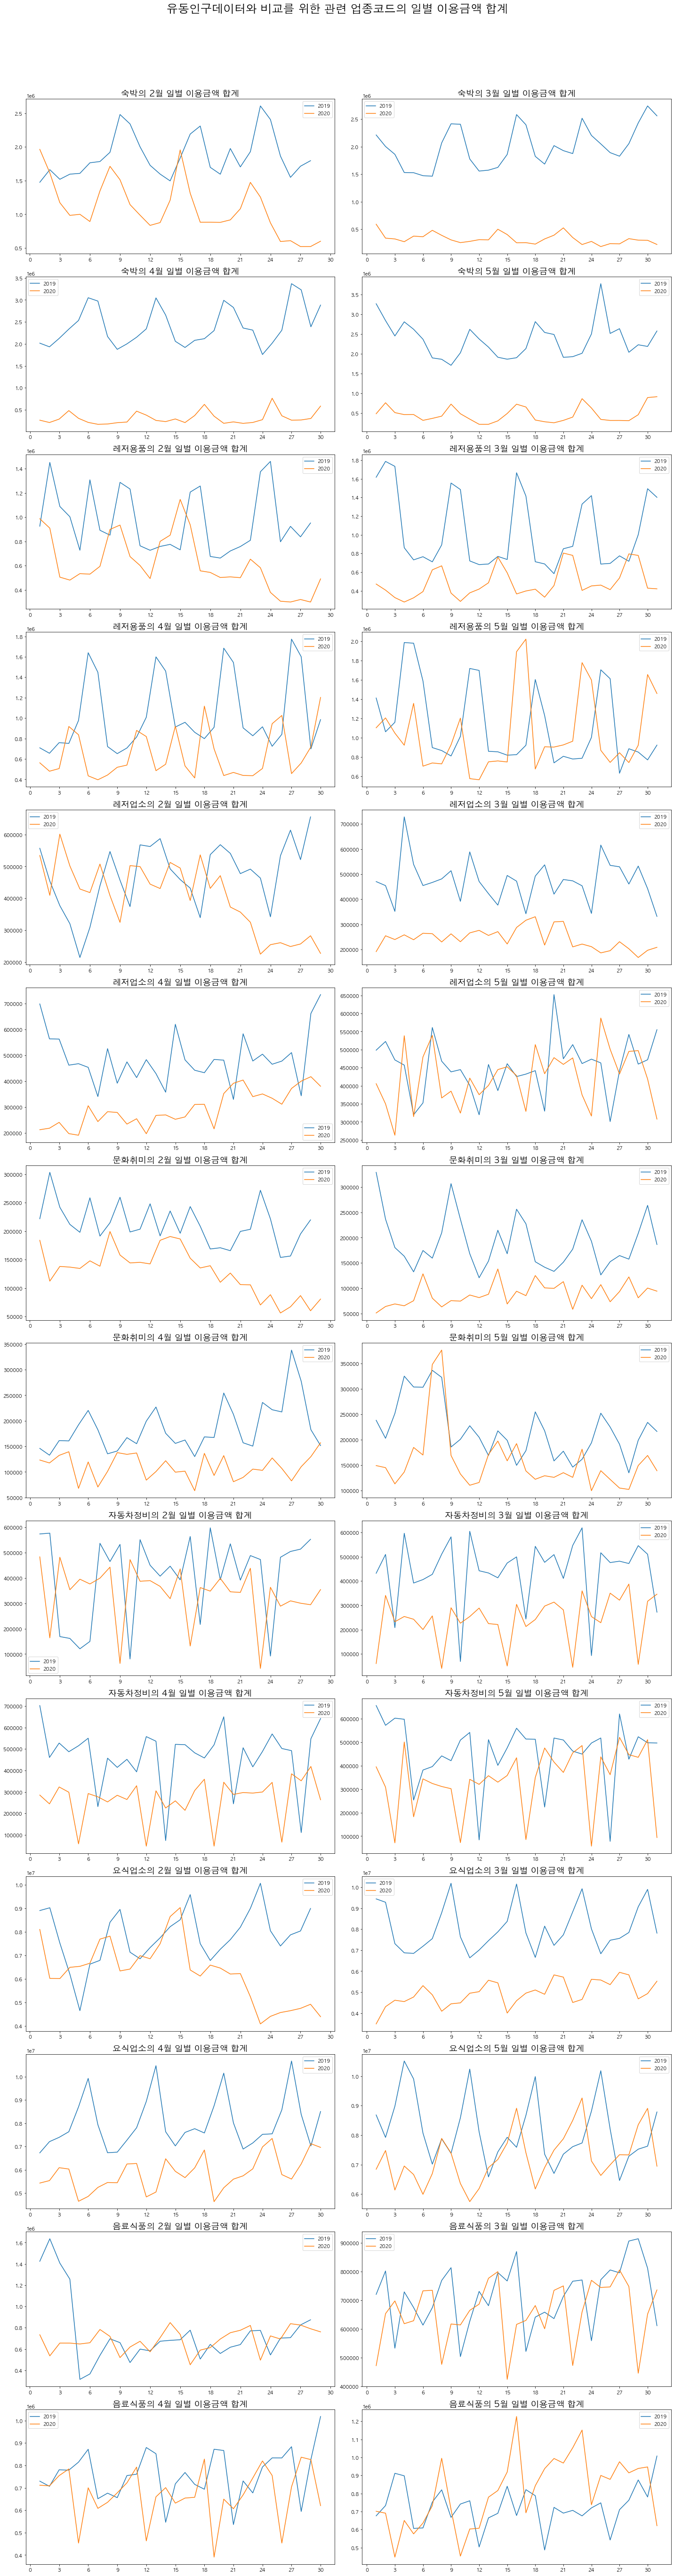

In [54]:
fig = plt.figure(figsize = (20,80))
fig.suptitle("유동인구데이터와 비교를 위한 관련 업종코드의 일별 이용금액 합계",fontsize = 24)
cnt = 0
cnt1 = 0
month = 2
for i in range(28):
    i = fig.add_subplot(14,2,i+1)
    x = [x for x in a[cnt]["기준일자"]]
    for k in range(len(x)):
        x[k] = int(str(x[k])[6:])
    i.plot(x,a[cnt]["이용금액"].tolist(),label = "2019")
    cnt += 1
    
    x = [x for x in a[cnt]["기준일자"]]
    for k in range(len(x)):
        x[k] = int(str(x[k])[6:])
    i.plot(x,a[cnt]["이용금액"].tolist(),label = '2020')
    
    i.legend(loc = "best")
    i.set_xticks([x for x in range(0,32,3)])
    i.set_title("{0}의 {1}월 일별 이용금액 합계".format(h[cnt1],month),fontsize = 18)
    cnt += 1
    month += 1
    if month == 6:
        month = 2
        cnt1 += 1
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 월 단위 나이대별 업종코드 이용금액 총 합 차이

In [55]:
temp = copy.copy(text_resident)
age = [x for x in set(temp["나이코드"])]
age.sort()
temp["기준월"].replace(c,inplace = True)
temp["업종코드"].replace(dic,inplace = True)
a= []
for i in range(10):
    t = pd.DataFrame(temp.loc[(temp["나이코드"] == age[i])].groupby(["기준해","기준월","업종코드"])["이용금액"].sum())
    a.append(t)

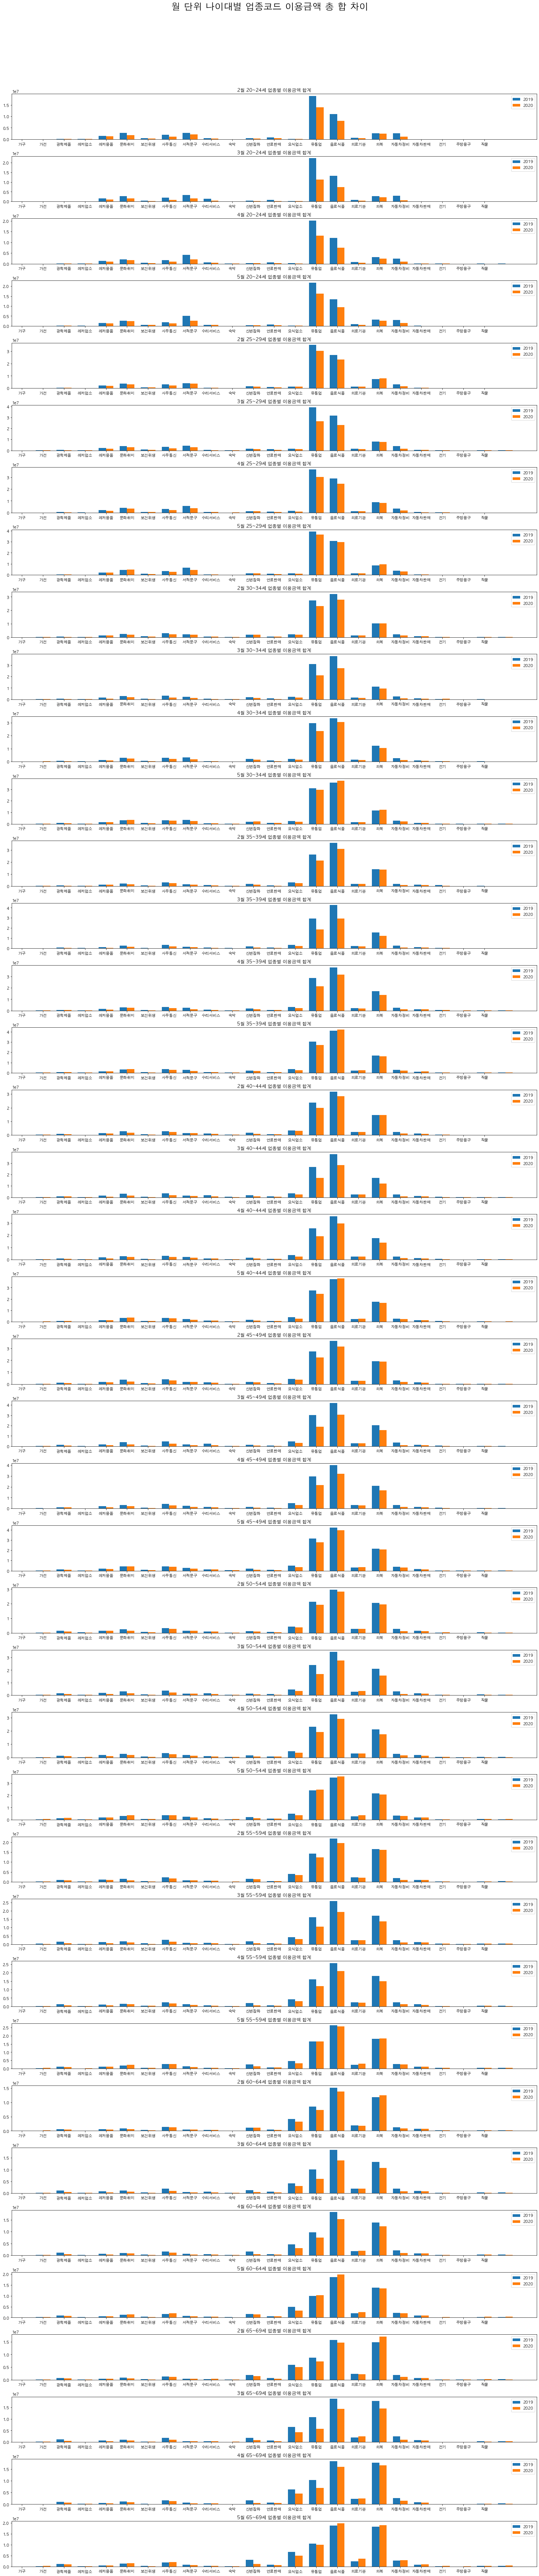

In [56]:
fig = plt.figure(figsize= (20,100))
fig.suptitle("월 단위 나이대별 업종코드 이용금액 총 합 차이",fontsize= 24)
bar_width = 0.35
cnt = 0
month = 2
j = 0
indx = np.arange(1,24)
for i in range(1,41):
    i = fig.add_subplot(40,1,i)
    i.bar(indx - bar_width/2,a[cnt].loc[2019,month]["이용금액"].tolist(),bar_width,label = "2019")
    i.bar(indx + bar_width/2,a[cnt].loc[2020,month]["이용금액"].tolist(),bar_width,label = "2020")
    i.legend(loc = "best")
    i.set_xticks([x for x in range(len(indx))])
    i.set_xticklabels([x for x in a[0].loc[2019,2].index.tolist()])
    i.set_title("{0}월 {1}~{2}세 업종별 이용금액 합계".format(month,age[cnt],(age[cnt]+4)))
                
    month += 1
    if month == 6:
        cnt += 1
        month = 2

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

age type : int

age 종류 : 20 ~ 24세 제목의 경우 20 입력, 30 ~ 34세 제목의 경우 30입력, 65 ~ 69세 제목의 경우 65 입력

int type : string 입력

ind 종류 : ['숙박', '레저용품', '레저업소', '문화취미', '가구', '전기', '주방용구', '연료판매', '광학제품', '가전', '유통업', '의복', '직물', '신변잡화', '서적문구', '사무통신', '자동차판매', '자동차정비', '의료기관', '보건위생', '요식업소', '음료식품', '수리서비스']

In [57]:
def CompareAge(age,ind):
    a = pd.DataFrame(temp.groupby(["나이코드","기준해","기준월","업종코드"])["이용금액"].sum())
    a = pd.DataFrame(a.loc[age,:,:,ind]["이용금액"])
    a.plot(kind = 'bar')
    return a

이용금액
나이코드 기준해  기준월 업종코드      
20   2019 2   전기     112
          3   전기    1576
          4   전기     560
          5   전기      91
     2020 2   전기    2904
          3   전기     341
          4   전기     118
          5   전기    1089

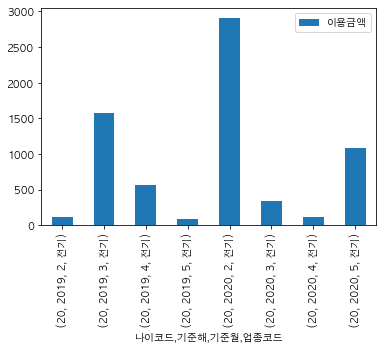

In [58]:
CompareAge(20,"전기")